In [11]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
# LOAD DATA
df = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [13]:
# CLEAN DATA
# Remove rows without Customer ID
df = df[df['Customer ID'].notnull()]

# Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Remove negative quantities
df = df[df['Quantity'] > 0]

In [15]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [16]:
# CALCULATE MONTETARY VALUE PER TRANSACTION
df['Monetary Value'] = df['Quantity'] * df['Price']


In [17]:
# DEFINE REFERENCE DATE
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date for Recency:", reference_date)


Reference date for Recency: 2011-12-10 12:50:00


In [18]:
# CALCULATE RFM FEATURES
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'Monetary Value': 'sum'
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Monetary Value': 'Monetary Value'
}, inplace=True)

rfm = rfm[rfm['Monetary Value'] > 0]

print(rfm.head())

   Customer ID  Recency  Frequency  Monetary Value
0      12346.0      326          1        77183.60
1      12347.0        2          7         4310.00
2      12348.0       75          4         1797.24
3      12349.0       19          1         1757.55
4      12350.0      310          1          334.40


In [19]:
# LOG TRANSFORMATION
rfm['Monetary Value_log'] = np.log1p(rfm['Monetary Value'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])


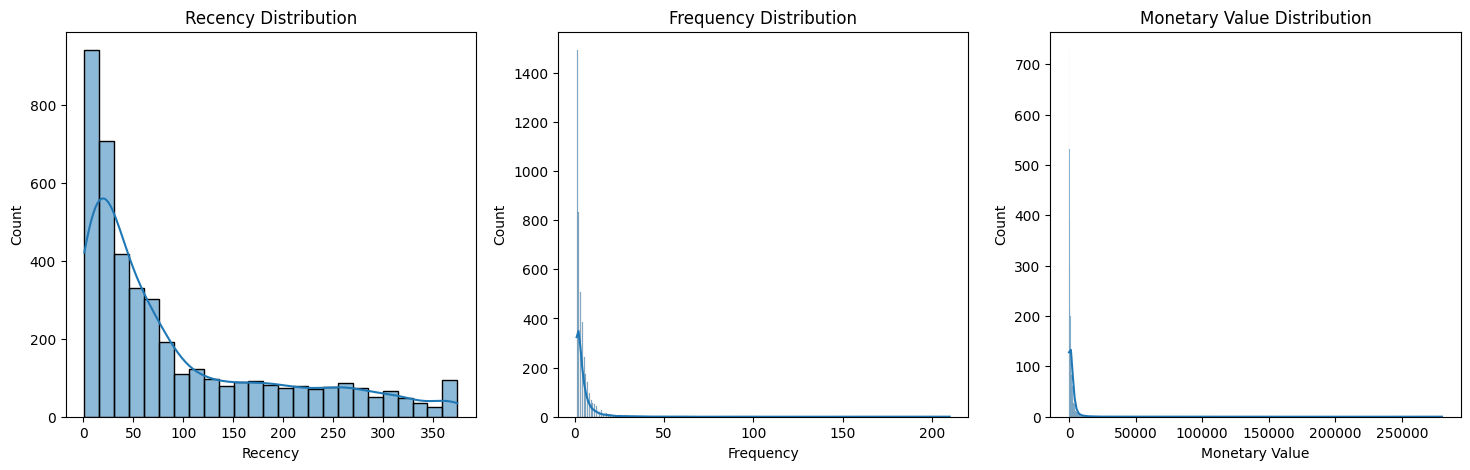

In [20]:
#DISTRIBUTION BEFORE LOG TRANSFORMATION
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], ax=axes[0], kde=True)
axes[0].set_title("Recency Distribution")
sns.histplot(rfm['Frequency'], ax=axes[1], kde=True)
axes[1].set_title("Frequency Distribution")
sns.histplot(rfm['Monetary Value'], ax=axes[2], kde=True)
axes[2].set_title("Monetary Value Distribution")
plt.show()


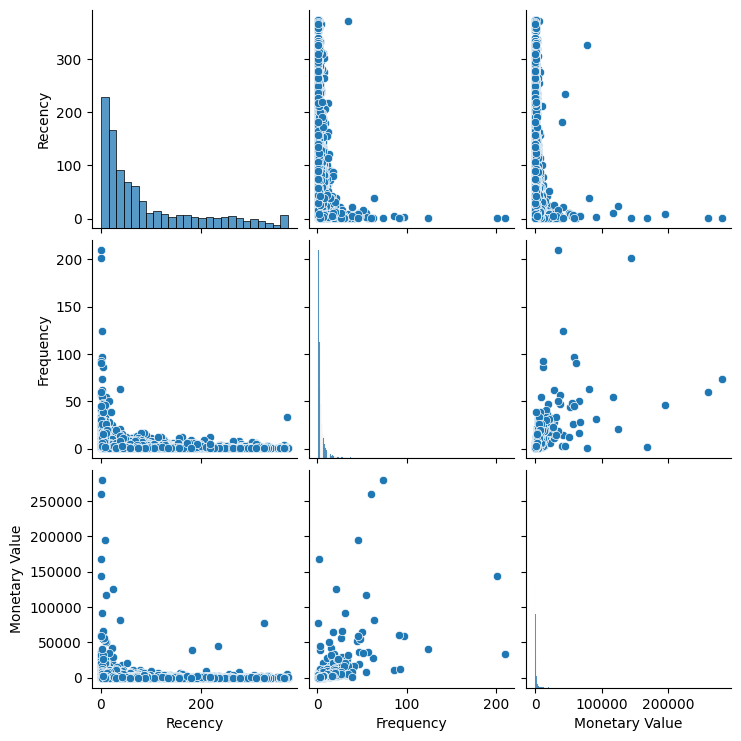

In [21]:
#PAIRPLOT
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary Value']])
plt.show()


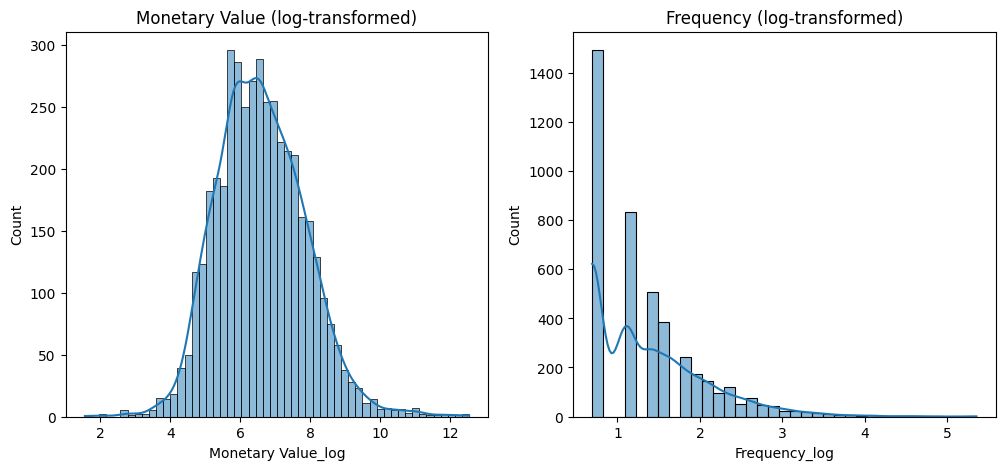

In [22]:
#DISTRIBUTION AFTER LOG TRANSFORMATION
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(rfm['Monetary Value_log'], ax=axes[0], kde=True)
axes[0].set_title("Monetary Value (log-transformed)")
sns.histplot(rfm['Frequency_log'], ax=axes[1], kde=True)
axes[1].set_title("Frequency (log-transformed)")
plt.show()


In [23]:
#SAFE FOR CLUSTERING
rfm.to_csv("rfm_features_transformed.csv", index=False)

Features saved to rfm_features_transformed.csv
